In [1]:
import numpy as np
from spectre.IO.Exporter import interpolate_to_points
from spectre.Visualization.OpenVolfiles import open_volfiles
from spectre.Visualization.ReadH5 import list_observations
import matplotlib.pyplot as plt
from pathlib import Path

In [10]:
dir = Path(
    "/Users/nilsvu/Projects/spectre/build-Default-Debug/test_self_force_complex_m1"
)
h5files = [str(dir / "ScalarSelfForceVolume0.h5")]
obs_ids, _ = list_observations(open_volfiles(h5files, "/VolumeData"))

data = []
for obs_id in obs_ids[1:]:
    data.append(
        interpolate_to_points(
            h5files,
            "/VolumeData",
            observation_id=obs_id,
            tensor_components=["Re(MMode)", "Im(MMode)"],
            target_points=[[100.0], [0.0]],
        )[0][0]
    )
data = np.array(data)

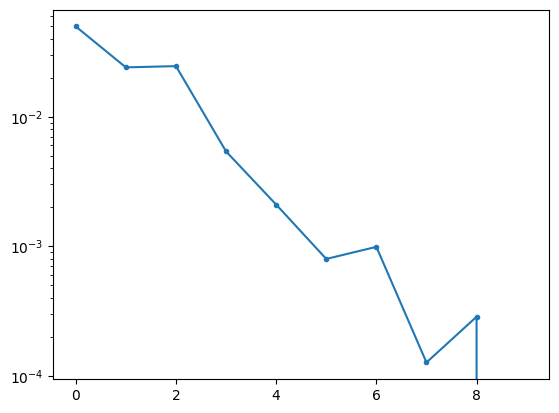

In [13]:
plt.semilogy(np.abs(data - data[-1]), marker=".")

- High m, need ~20 modes?
- Compute self force (Tommy sends instructions)
- AMR -> convergence test -> exponential with hp AMR
- Improve numerical methods for spherical Laplacian
- Reach high accuracy?
  - High spin a=0.9, small orbital radius (ISCO), Mathematica reaches
    10^-3 relative error for self force, then stopped converging.
  - What accuracy does Rodrigo reach?
  - Cancellation errors occur in self force calculation.
  - Try very high spins, how high can we go?

- Hyperboloidal slices?
  - Spatial domain is numerically finite. No ambiguity about outer boundary conditions.
  - Can it make the horizon well behaved?
  - Is everything better behaved on hyperboloidal slices?